In [1]:
import os
os.environ["OPENAI_API_TYPE"] = "azure"
os.environ["OPENAI_API_BASE"] = "https://yourterminal.openai.azure.com/" #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!此处设置自己的terminal
os.environ["OPENAI_API_KEY"] = "your api key" #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!此处设置自己的API Key
os.environ["OPENAI_API_VERSION"] = "2023-05-15"

In [2]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("./data/CloudPSS SDK.pdf")
docs = loader.load_and_split()

In [3]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500, chunk_overlap=0, add_start_index=True
)
all_splits = text_splitter.split_documents(docs)

In [4]:
# load documents
# 运行前，请确保已经完成向量数据库生成，./data/chroma_db未被破坏
from langchain.vectorstores.chroma import Chroma
from langchain.embeddings.openai import OpenAIEmbeddings
db3 = Chroma(persist_directory="./data/chroma_db/", embedding_function=OpenAIEmbeddings(deployment="your embedding name", #!!!!!!!!!!!此处设置自己的text embedding name
                                                                                        disallowed_special=()))
db3.similarity_search("CloudPSS SDK的功能")

[Document(page_content='SDK 简介\nCloudPSS SDK 是基于 CloudPSS-A PI封装的模型及软件开发套件。用户可通过编写 Python、Matlab 等脚本构建自定义模型，或是\n调用 CloudPSS 平台中的模型修改、仿真计算功能，实现诸如自动修改模 型、批量仿真计算、自动化生成报告等复杂且繁琐的功能。\n用户也可在其自己的应用程序中调用 CloudPSS 仿真引擎，实现仿真驱动的高级分析应用。\nCloudPSS SDK 包含模型层、算法层和应用层三种开发套件，其中：\n1. 模 型 层 开 发 套 件帮助用户在 CloudPSS SimS tudio 官方潮流计算、电磁暂态仿真、移频电磁暂态仿真、综合能源能量流计算等内\n核中开发第三方模型或用户自定义模型。目前，模型层 SDK 已开放基于 Matlab 函数的自定义控制元件接入，后续将进一步开放\nPython、C/C++ 的标准元件开发套件。\n2. 算 法 层 开 发 套 件帮助用户在 CloudPSS FuncS tudio 中集成自己的算法内核，从而借助 CloudPSS XS tudio 平台快速开发并部署\n自己的计算应用。\n3. 应 用 层 开 发 套 件帮助用户在利用脚本的形式快速调用 CloudPSS 官方计算内核和第三方接入的计算内核，从而方便用户开发高级\n计算分析应用。其中，SimS tudio-SDK 现已支持 SimS tudio 中的模型修改和 潮 流 计 算、 电 磁 暂 态 仿 真、 综 合 能 源 能 量 流 计 算三\n种计算内核。\nCloudPSS-SDK\n模型层 算法层 应用层\nMatlab 函数 C/C++ Python 函数 FuncStudio-SDK SimStudio-SDK AppStudio-SDK\n665', metadata={'page': 1, 'source': './data/CloudPSS SDK.pdf'}),
 Document(page_content='CloudPSS 接口文档\nToken 申请 与设置\nModel 类\nRunner 类\nFunction 类\nFunctionJob 类\nProject 类\n681', metadata={'page': 17,

In [5]:
retriever = db3.as_retriever(
    search_type="similarity", 
    search_kwargs={"k": 8},
)

In [6]:
from langchain.chat_models import AzureChatOpenAI
llm = AzureChatOpenAI(deployment_name="your deployment name", #!!!!!!!!!!!此处设置自己的deployment name
                      model_name="gpt-35-turbo",
                      temperature=0.7)

In [17]:
print(llm.invoke("请帮我编写一段代码，利用cloudpss sdk完成仿真，读取仿真结果并画图。").content)

当然可以！以下是一个简单的示例代码，展示如何使用CloudPSS SDK实现仿真和绘图：

```python
import cloudpss_sdk as cpss
import matplotlib.pyplot as plt

# 创建仿真模型
model = cpss.Model()

# 添加组件到仿真模型
comp1 = model.create_component("Comp1")
comp2 = model.create_component("Comp2")

# 设置组件之间的连线关系
model.connect(comp1, comp2)

# 设置仿真参数
model.set_parameter("time_step", 0.1)
model.set_parameter("simulation_time", 10.0)

# 运行仿真
model.run_simulation()

# 获取仿真结果
result = model.get_result()

# 绘制仿真结果图表
time = result["Time"]
output1 = result["Comp1.Output"]
output2 = result["Comp2.Output"]

plt.plot(time, output1, label="Comp1 Output")
plt.plot(time, output2, label="Comp2 Output")
plt.xlabel("Time")
plt.ylabel("Output")
plt.legend()
plt.show()
```

在这个示例中，首先创建了一个`Model`对象，然后使用`create_component`方法创建了两个组件`Comp1`和`Comp2`，然后使用`connect`方法将两个组件连接起来。接下来，使用`set_parameter`方法设置了仿真参数，包括时间步长和仿真时间。然后，调用`run_simulation`方法运行仿真，最后使用`get_result`方法获取仿真结果。最后，使用Matplotlib库绘制了两个组件的输出随时间变化的曲线图。

请注意，上述代码仅为示例，具体的仿真模型和参数设置需要根据实际需求进行调整。另外，还需要安装`cloudpss_sdk`和`m

In [18]:
import cloudpss_sdk as cpss
import matplotlib.pyplot as plt

# 创建仿真模型
model = cpss.Model()

# 添加组件到仿真模型
comp1 = model.create_component("Comp1")
comp2 = model.create_component("Comp2")

# 设置组件之间的连线关系
model.connect(comp1, comp2)

# 设置仿真参数
model.set_parameter("time_step", 0.1)
model.set_parameter("simulation_time", 10.0)

# 运行仿真
model.run_simulation()

# 获取仿真结果
result = model.get_result()

ModuleNotFoundError: No module named 'cloudpss_sdk'

In [13]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [25]:
from langchain.prompts import PromptTemplate
from langchain.schema.runnable import RunnablePassthrough
from langchain.schema import StrOutputParser

# Use three sentences maximum and keep the answer as concise as possible. 
# Always say "thanks for asking!" at the end of the answer. 

template = """Use the following pieces of context to answer the question or generate code at the end. 
When you generate code, do not use "try" and "exception". Do not use "try" and "except"
If you don't know the answer, just say that you don't know, don't try to make up an answer. 
{context}
Question: {question}
Helpful Answer:"""
rag_prompt_custom = PromptTemplate.from_template(template)

rag_chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | rag_prompt_custom
    | llm
    | StrOutputParser()
)

In [35]:
print(rag_chain.invoke("请帮我编写一段代码，利用cloudpss sdk完成仿真，读取仿真结果并画图。"))

import sys
import cloudpss
import json
import matplotlib.pyplot as plt

if __name__ == '__main__':
    cloudpss.setToken('{token}')
    
    # 获取指定 rid 的项目
    model = cloudpss.Model.fetch('model/Demo/SDK_TEST1')
    
    # 启动计算任务
    config = model.configs[0]  # 若未设置，则默认用 model 的第一个 config （参数方案）
    job = model.jobs[0]  # 若未设置，则默认用 model 的第一个 job （计算方案）
    runner = model.run(job, config)
    
    while not runner.status():
        print('running')
        # 获取通道分组下的曲线名称
        plotKeys = runner.result.getPlotChannelNames(1)
        if plotKeys is not None:
            for val in plotKeys:
                # 获取曲线数据
                channel = runner.result.getPlotChannelData(1, val)
                plt.plot(channel['x'], channel['y'], label=val)
        
        plt.pause(0.1)
    
    print('end')
    plt.legend()
    plt.show()


running
running
running
running
running
running
end


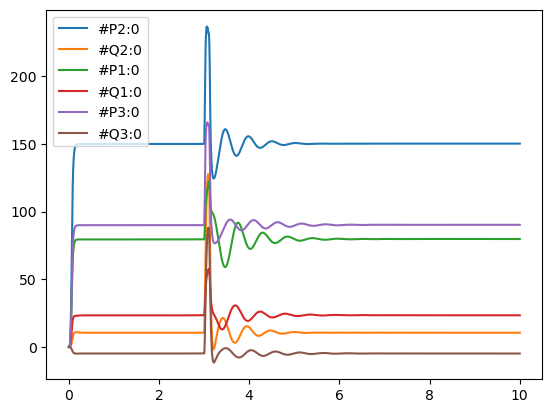

In [38]:
import time #!!!!!!!!!!!!!!用于程序休眠等待
import cloudpss
import matplotlib.pyplot as plt

if __name__ == '__main__':
    cloudpss.setToken('{token}') #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!此处需要注册cloudpss.net，申请sdk token
    
    # 获取指定 rid 的项目
    model = cloudpss.Model.fetch('model/your name/your project') #!!!!!!!!!!!!此处需要根据情况设置项目名称
    
    # 启动计算任务
    config = model.configs[0]  # 若未设置，则默认用 model 的第一个 config （参数方案）
    job = model.jobs[1]  # 若未设置，则默认用 model 的第一个 job （计算方案）!!!!!!!!!!!!!!!!!!!! 此处需要按需修改，设置对应仿真任务的job
    runner = model.run(job, config)
    
    while not runner.status():
        print('running')
        time.sleep(1) #!!!!!!!!!!!此处增加休眠，避免不必要输出
    #!!!!!!!!!!!!!此处缩进调整
    # 获取通道分组下的曲线名称
    plotKeys = runner.result.getPlotChannelNames(1)
    if plotKeys is not None:
        for val in plotKeys:
            # 获取曲线数据
            channel = runner.result.getPlotChannelData(1, val)
            plt.plot(channel['x'], channel['y'], label=val)
    
    print('end')
    plt.legend()
    plt.show()